In [6]:
cd Data-Science/nlp-twitter-sentiment/data

C:\Users\Rajesh\Data-Science\nlp-twitter-sentiment\data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Rajesh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
train=pd.read_csv('train_2kmZucJ.csv')
test=pd.read_csv('test_oJQbWVk.csv')
#sample=pd.read_csv('sample_submission_LnhVWA4.csv')

In [9]:
test.shape

(1953, 2)

In [10]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [5]:
train.tweet[0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [9]:
train.tweet[4]

"What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!"

In [11]:
badword='$&@*#'

In [24]:
tt=train['tweet'].apply(lambda x:x.split())

In [17]:
z=[]
c=0
h=0
for i in tt:
    l=[]
    for j in i:
        if j==badword:
            j=j.replace('$&@*#','vulgar')
            c+=1
        elif j=='#{}'.format(badword):
            j=j.replace('#{}'.format(badword),'#vulgar')
            h+=1
        l.append(j)
    z.append(l)

In [19]:
train['tweets']=z


In [27]:
tt=test['tweet'].apply(lambda x:x.split())

In [21]:
z=[]
c=0
h=0
for i in tt:
    l=[]
    for j in i:
        if j==badword:
            j=j.replace('$&@*#','vulgar')
            c+=1
        elif j=='#{}'.format(badword):
            j=j.replace('#{}'.format(badword),'#vulgar')
            h+=1
        l.append(j)
    z.append(l)

In [22]:
test['tweets']=z

In [23]:
test.head()

,id,tweet,tweets
0,7921,I hate the new #iphone upgrade. Won't let me d...,"[I, hate, the, new, #iphone, upgrade., Won't, ..."
1,7922,currently shitting my fucking pants. #apple #i...,"[currently, shitting, my, fucking, pants., #ap..."
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...","[I'd, like, to, puts, some, CD-ROMS, on, my, i..."
3,7924,My ipod is officially dead. I lost all my pict...,"[My, ipod, is, officially, dead., I, lost, all..."
4,7925,Been fighting iTunes all night! I only want th...,"[Been, fighting, iTunes, all, night!, I, only,..."


In [16]:
train.head()

,id,label,tweet,tweets
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,"[#fingerprint, #Pregnancy, Test, https://goo.g..."
1,2,0,Finally a transparant silicon case ^^ Thanks t...,"[Finally, a, transparant, silicon, case, ^^, T..."
2,3,0,We love this! Would you go? #talk #makememorie...,"[We, love, this!, Would, you, go?, #talk, #mak..."
3,4,0,I'm wired I know I'm George I was made that wa...,"[I'm, wired, I, know, I'm, George, I, was, mad..."
4,5,1,What amazing service! Apple won't even talk to...,"[What, amazing, service!, Apple, won't, even, ..."


In [25]:
z=[]
for i in tt:
    l=[]
    for j in i:
        if j.__contains__('$&@*#'):
            j=j.replace(j,'bad')
        l.append(j)
    z.append(l)       

In [26]:
train['tweets']=z

In [28]:
z=[]
for i in tt:
    l=[]
    for j in i:
        if j.__contains__('$&@*#'):
            j=j.replace(j,'bad')
        l.append(j)
    z.append(l)       

In [29]:
test['tweets']=z

In [33]:
l=[]
for i in train['tweets']:
    l.append(" ".join(i))
    

In [34]:
train['tweet_r']=l

In [35]:
l=[]
for i in test['tweets']:
    l.append(" ".join(i))
    

In [36]:
test['tweet_r']=l

#lets first remove thwe links that are present 
#re.sub('https?://[A-Za-z0-9./]+','',train.tweet_r[0])

In [37]:
train['mail_tweets']=train['tweet_r'].str.replace('https?://[A-Za-z0-9./]+',' ')

In [38]:
test['mail_tweets']=test['tweet_r'].str.replace('https?://[A-Za-z0-9./]+',' ')

In [27]:
train['mail_tweets'][0]

'#fingerprint #Pregnancy Test   #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [28]:
train['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [39]:
train['clean_tweets']=train['mail_tweets'].str.replace("[^a-zA-Z]"," ")

In [40]:
test['clean_tweets']=test['mail_tweets'].str.replace("[^a-zA-Z]"," ")

1) removing the bad words

2) filtered out URL's

3) removed special characters and numbers .

In [64]:
#lets define a whole function call process_tweets which would remove urls,punctuatuions and numbers.
def process_tweets(train):
    train['asdd']=train['tweet'].str.replace('https?://[A-Za-z0-9./]+',' ')
    train['asdd']=train['asdd'].str.replace('[^a-zA-Z]',' ')
process_tweets(train)     

In [41]:
train.drop(columns=['tweet','tweets','id','tweet_r','mail_tweets'],inplace=True)

In [42]:
test.drop(columns=['tweet','tweets','id','tweet_r','mail_tweets'],inplace=True)

In [43]:
train.columns

Index(['label', 'clean_tweets'], dtype='object')

In [44]:
test.head()

,clean_tweets
0,I hate the new iphone upgrade Won t let me d...
1,currently shitting my fucking pants apple i...
2,I d like to puts some CD ROMS on my iPad is t...
3,My ipod is officially dead I lost all my pict...
4,Been fighting iTunes all night I only want th...


In [72]:
# label =1--------->negative
# label =2---------> postitive

In [73]:
train['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [45]:
test.to_csv('test_clean_tweets.csv',index=False)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2,max_features=500, stop_words='english') 
bow = bow_vectorizer.fit_transform(train['clean_tweets']) 
bow.shape

(7920, 500)

In [65]:
tdf_vectorize=TfidfVectorizer(max_df=0.90, min_df=2,max_features=500)
tfidf = tdf_vectorize.fit_transform(test['clean_tweets'])
tfidf.shape

(1953, 500)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [10]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow,train['label'],random_state=42,test_size=0.3)

In [13]:
lr=LogisticRegression()
lr.fit(xtrain_bow,ytrain)
lr.score(xvalid_bow,yvalid)

0.875

In [52]:
xtrain_tdf, xvalid_tdf, ytrain, yvalid = train_test_split(tfidf, train['label'],random_state=42,test_size=0.3)

In [53]:
lr=LogisticRegression()
lr.fit(xtrain_tdf,ytrain)
lr.score(xvalid_tdf,yvalid)

0.8766835016835017

In [54]:
pred=lr.predict(xvalid_tdf)

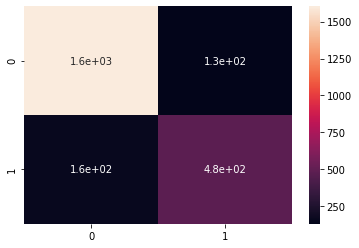

In [55]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(yvalid,pred),annot=True)

In [56]:
from sklearn.metrics import classification_report

print(classification_report(yvalid,pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1735
           1       0.78      0.75      0.77       641

    accuracy                           0.88      2376
   macro avg       0.85      0.84      0.84      2376
weighted avg       0.88      0.88      0.88      2376



In [59]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(xtrain_tdf, ytrain)
print('Original dataset shape %s' % Counter(ytrain))
print('Resampled dataset shape %s' % Counter(y_smote))

Original dataset shape Counter({0: 4159, 1: 1385})
Resampled dataset shape Counter({0: 4159, 1: 4159})


In [60]:
lr=LogisticRegression()

In [62]:
lr.fit(X_smote,y_smote)

LogisticRegression()

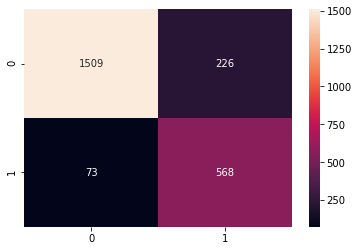

In [63]:
y_predict_smote = lr.predict(xvalid_tdf)
sns.heatmap(confusion_matrix(yvalid, y_predict_smote), annot=True, fmt='0.0f');

In [64]:
print(classification_report(yvalid,y_predict_smote))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1735
           1       0.72      0.89      0.79       641

    accuracy                           0.87      2376
   macro avg       0.83      0.88      0.85      2376
weighted avg       0.89      0.87      0.88      2376



In [66]:
real=lr.predict(tfidf)

In [71]:
sample=pd.read_csv('sample_submission_LnhVWA4.csv')

In [72]:
sample['label']=real

In [74]:
sample.to_csv('sumitthis.csv',index=False)

not much differnce between tfidf and bag of words video so lets try random forest generator

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(xtrain_bow,ytrain)
rf.score(xvalid_bow,yvalid)

0.8543771043771043

In [19]:
rf=RandomForestClassifier()
rf.fit(xtrain_tdf,ytrain)
rf.score(xvalid_tdf,yvalid)

0.8526936026936027

In [53]:
#since logistic regression performs the best let us clean the test set
sample.to_csv('submit.csv',index=False)

In [57]:
rfp=lr.predict(xvalid_tdf)

In [58]:
f1_score(yvalid,rfp)

0.7661612130885873